In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


pd.set_option('display.max_rows', 500)



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:/Users/baswa/Downloads/train (2).csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
df_num=df.select_dtypes(exclude='object')
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [6]:
df_cat=df.select_dtypes(include='object')
df_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [7]:
df_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [8]:
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [9]:
df_cat.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [10]:
df_cat.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [11]:
for i in df_cat:
    df_cat[i]=df_cat[i].fillna(df_cat[i].mode()[0])

In [12]:
df_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [13]:
for i in df_num:
    df_num[i]=df_num[i].fillna(df_num[i].mean())

In [14]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

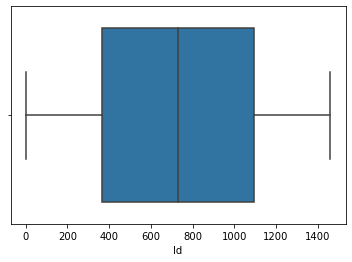

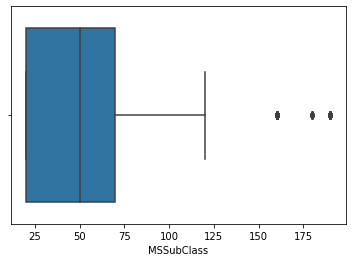

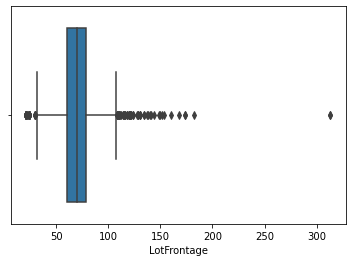

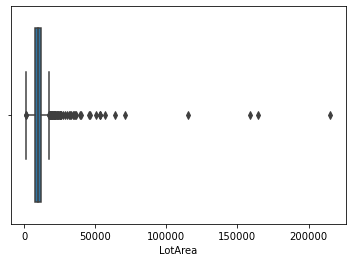

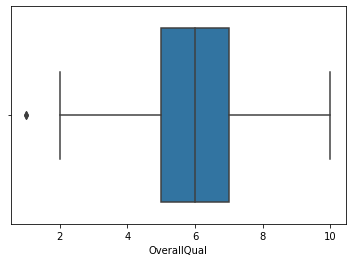

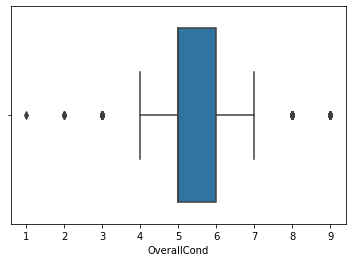

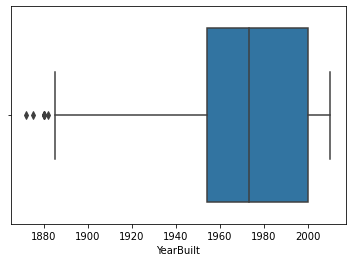

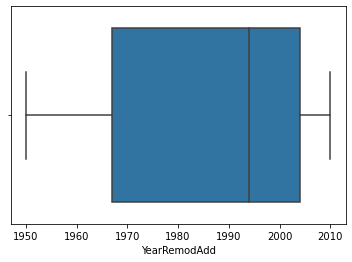

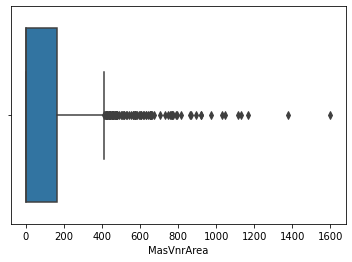

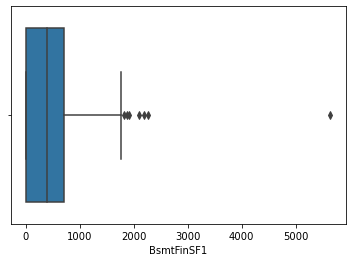

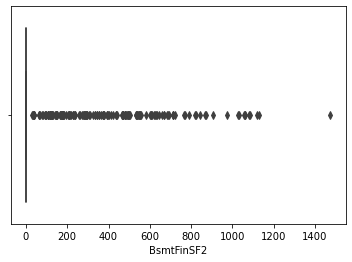

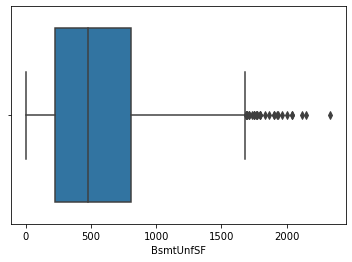

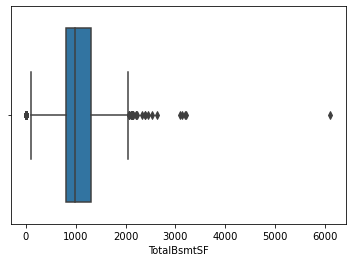

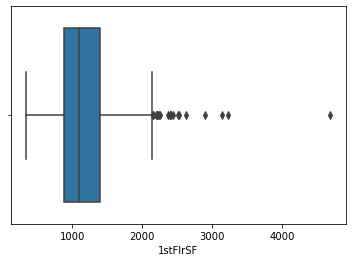

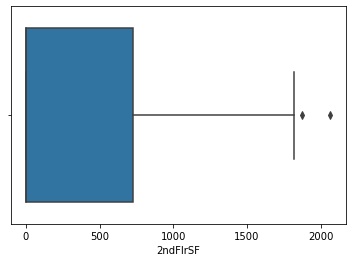

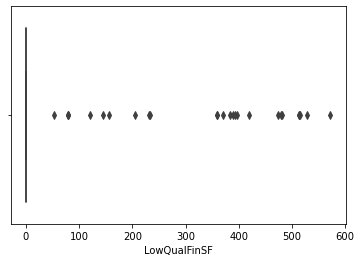

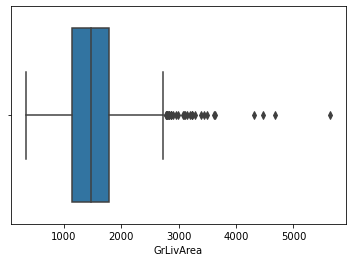

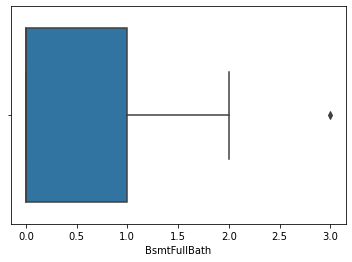

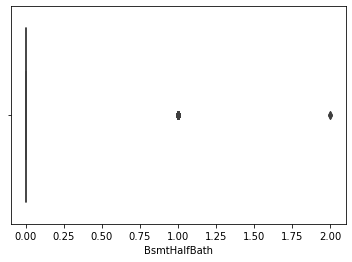

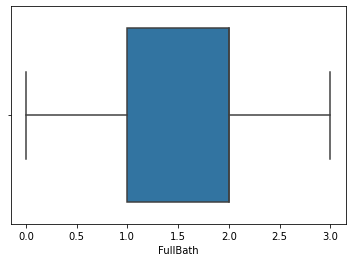

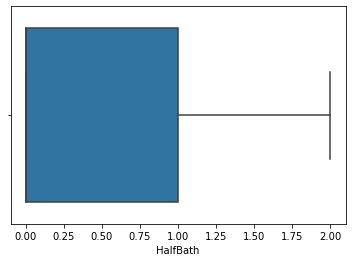

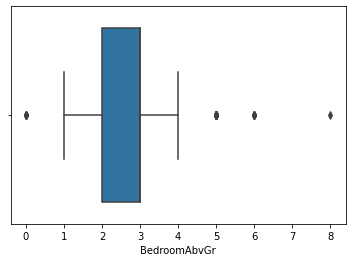

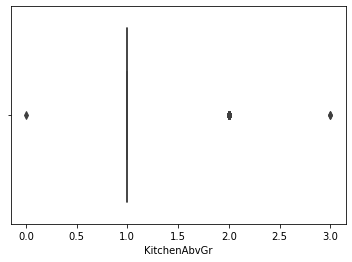

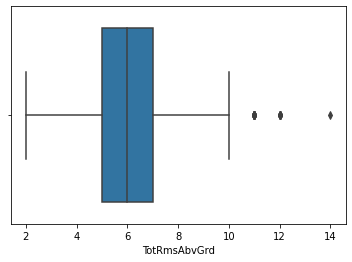

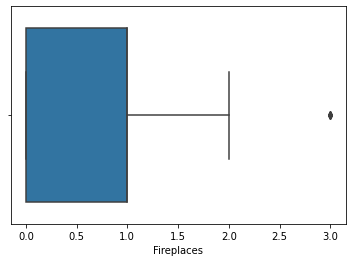

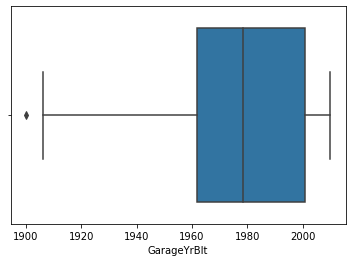

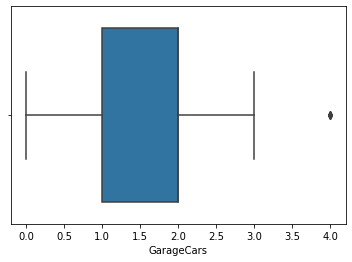

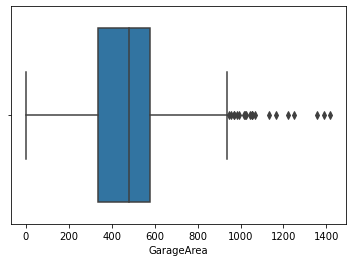

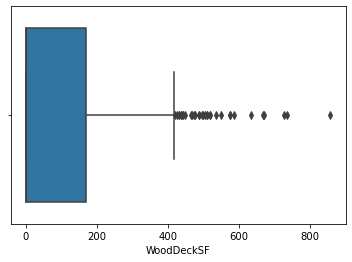

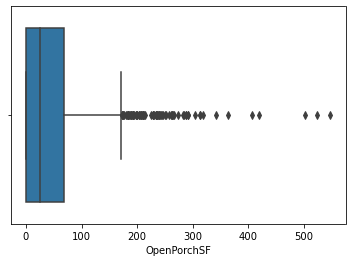

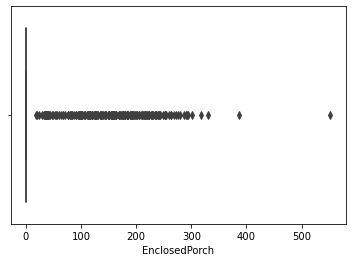

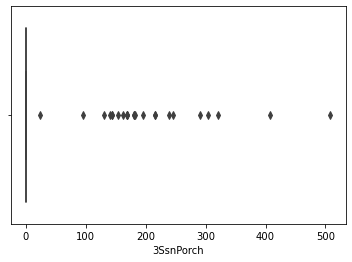

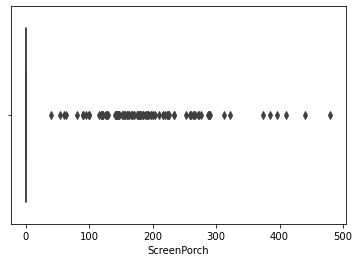

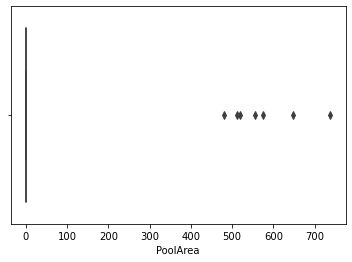

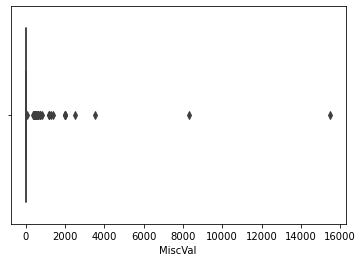

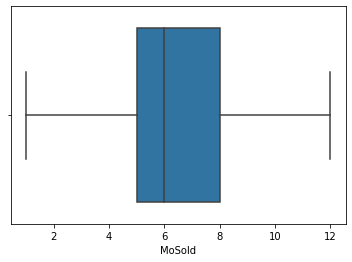

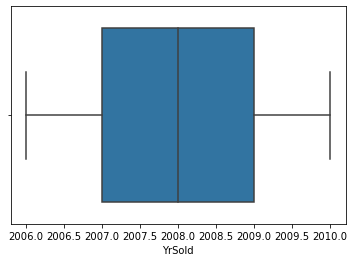

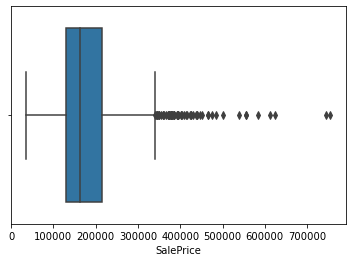

In [15]:
for i in df_num:
    sns.boxplot(x=i,data=df_num)
    plt.show()

In [16]:
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    q3 = df_num[col].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for ind in df_num[col].index:
        if df_num.loc[ind,col]<ll:
            df_num.loc[ind,col]=ll
        if df_num.loc[ind,col]>ul:
            df_num.loc[ind,col]=ul

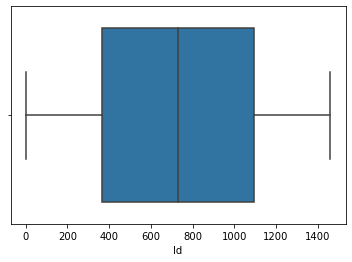

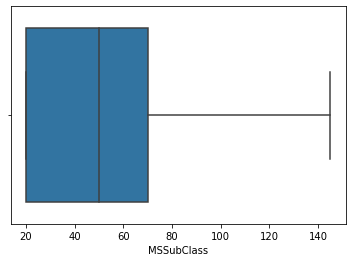

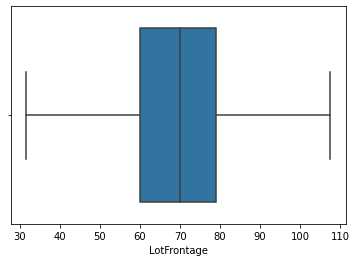

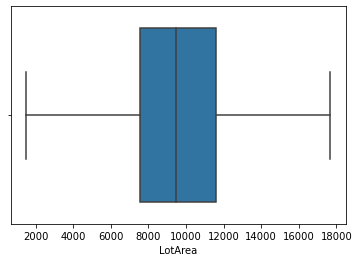

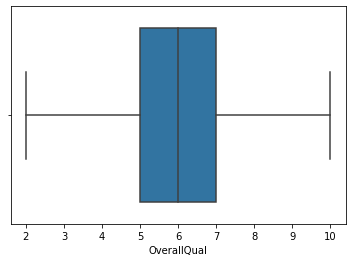

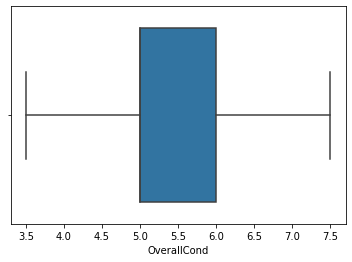

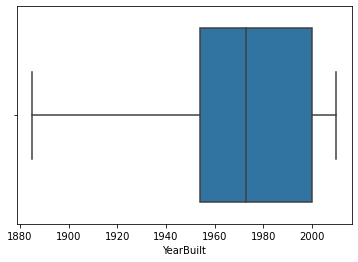

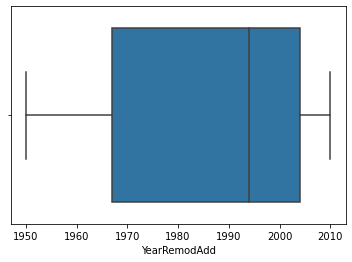

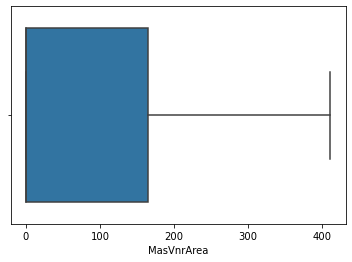

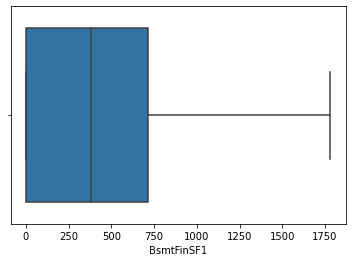

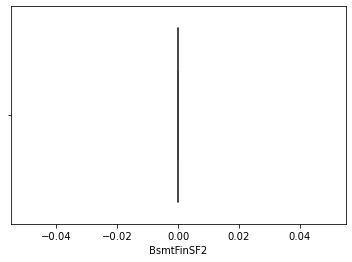

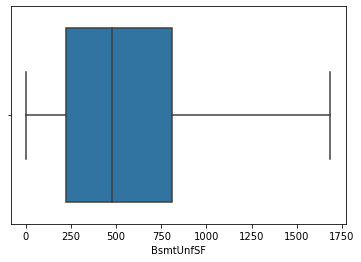

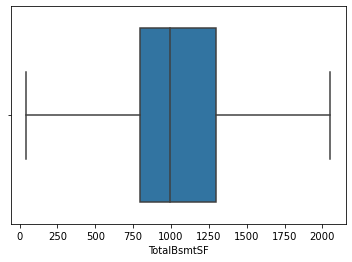

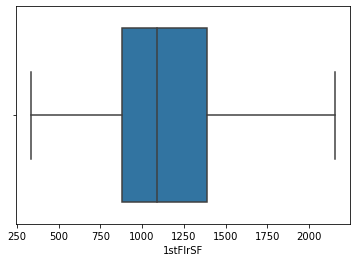

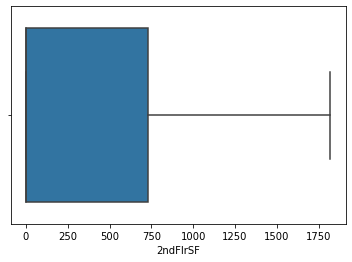

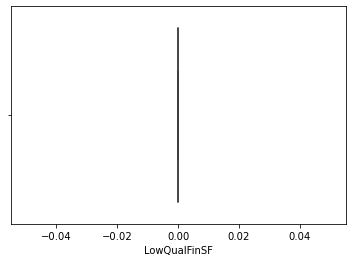

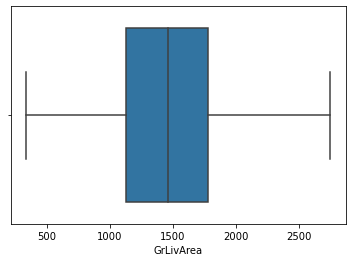

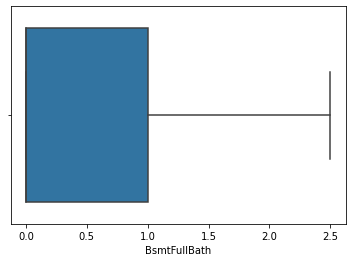

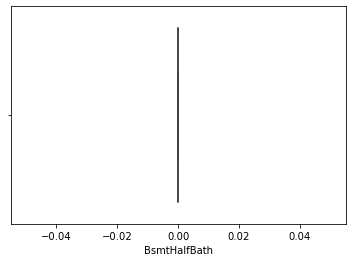

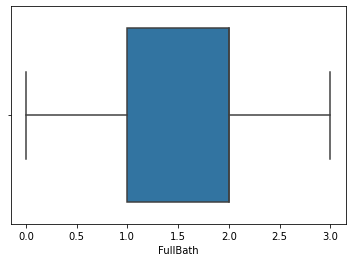

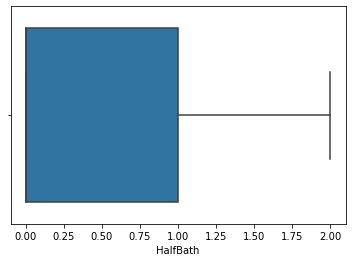

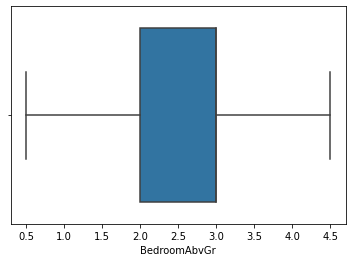

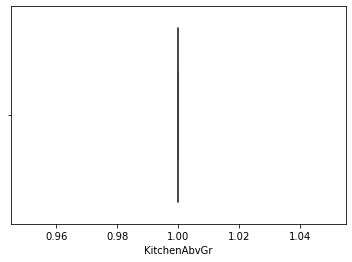

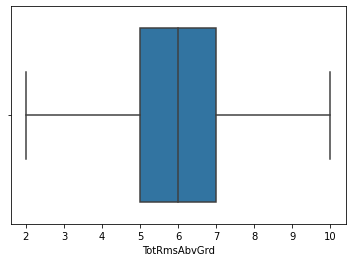

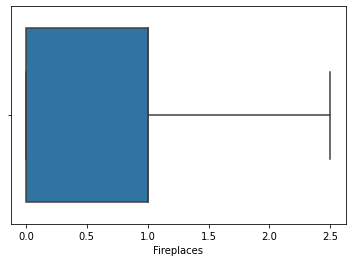

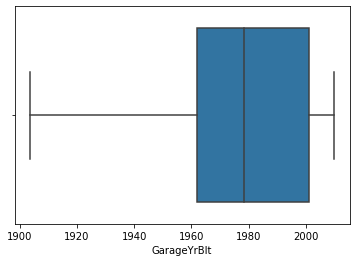

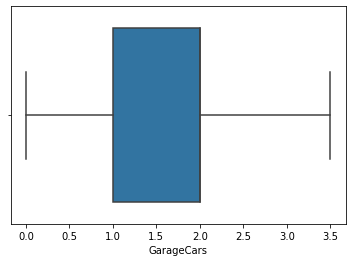

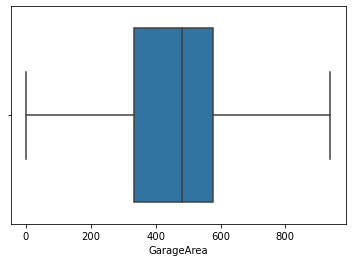

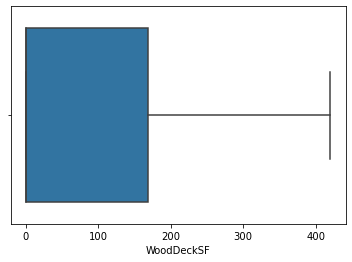

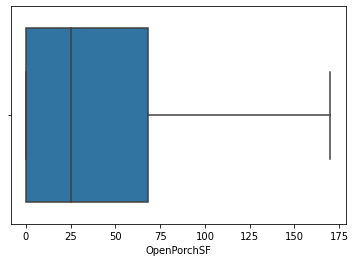

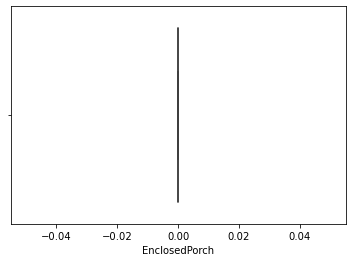

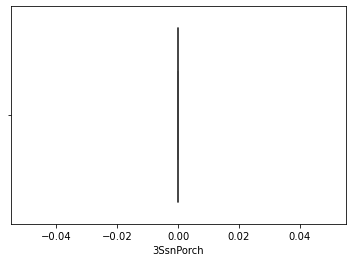

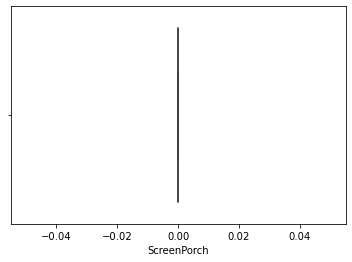

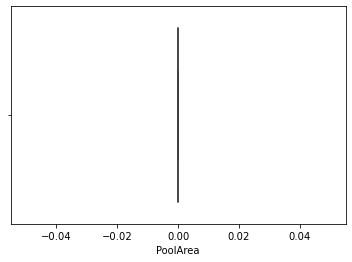

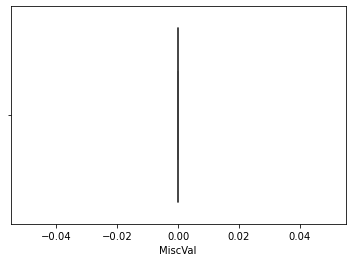

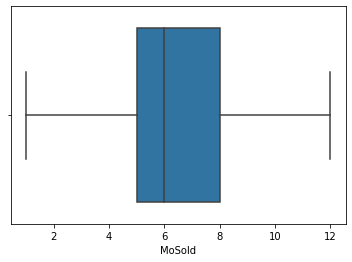

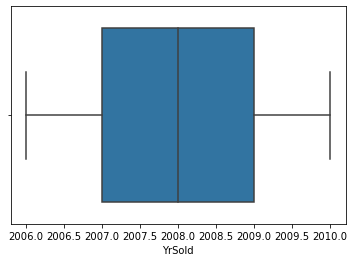

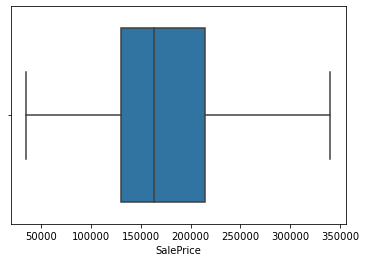

In [17]:
for i in df_num:
    sns.boxplot(x=i,data=df_num)
    plt.show()

<AxesSubplot:>

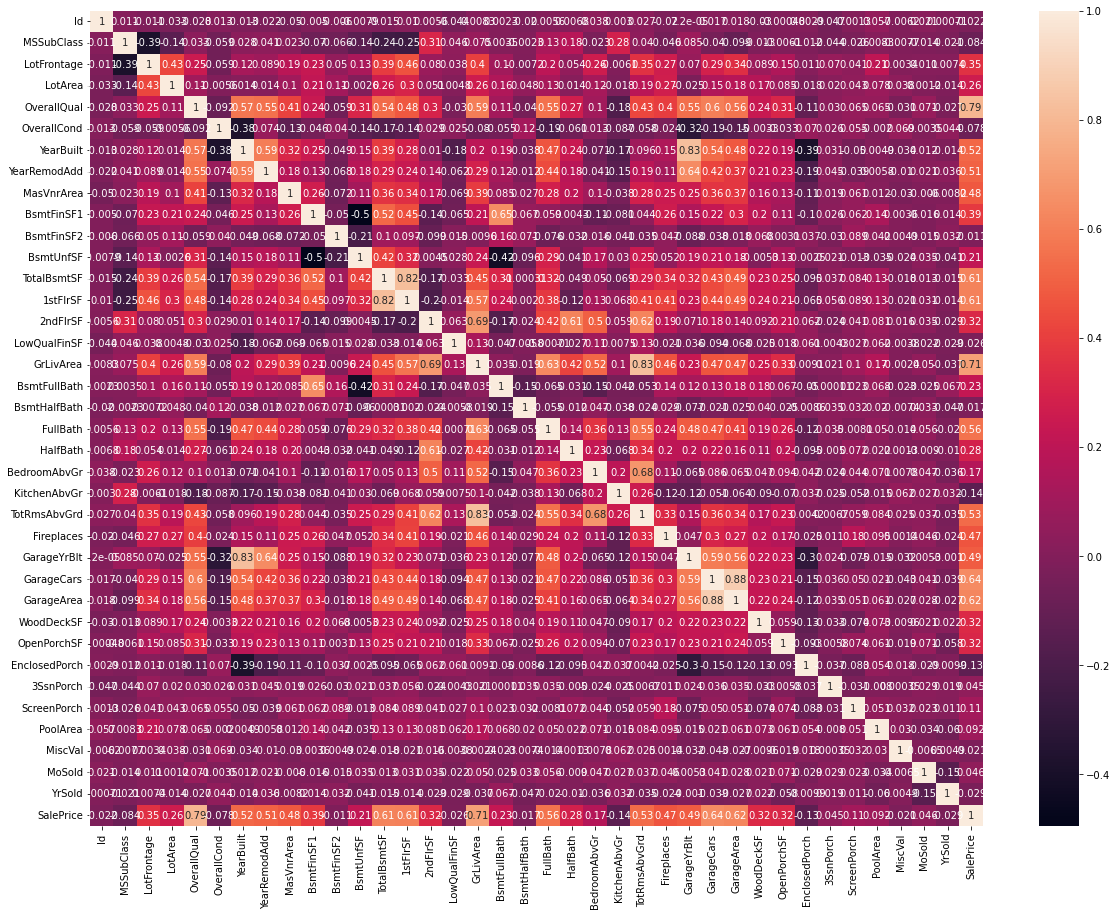

In [18]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
LB=LabelEncoder()

In [21]:
for i in df_cat:
    df_cat[i]=LB.fit_transform(df_cat[i])

In [22]:
df_cat

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,2,1,2,4,4,2,8,4


In [23]:
df_new=pd.concat([df_num,df_cat],1)
df_new

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450.0,7,5.0,2003,2003,196.0,706.0,...,2,6,2,1,1,4,4,2,8,4
1,2,20,80.0,9600.0,6,7.5,1976,1976,0.0,978.0,...,3,6,4,1,1,4,4,2,8,4
2,3,60,68.0,11250.0,7,5.0,2001,2002,162.0,486.0,...,2,6,4,1,1,4,4,2,8,4
3,4,70,60.0,9550.0,7,5.0,1915,1970,0.0,216.0,...,2,6,2,5,2,4,4,2,8,0
4,5,60,84.0,14260.0,8,5.0,2000,2000,350.0,655.0,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917.0,6,5.0,1999,2000,0.0,0.0,...,3,6,4,1,1,4,4,2,8,4
1456,1457,20,85.0,13175.0,6,6.0,1978,1988,119.0,790.0,...,3,2,4,1,2,4,4,2,8,4
1457,1458,70,66.0,9042.0,7,7.5,1941,2006,0.0,275.0,...,2,6,2,1,1,4,4,2,8,4
1458,1459,20,68.0,9717.0,5,6.0,1950,1996,0.0,49.0,...,2,6,2,1,2,4,4,2,8,4


In [24]:
df_new.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st 

In [25]:
x=df_new.drop('SalePrice',1)
y=df_new['SalePrice']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1168, 76)
(1168,)
(292, 76)
(292,)


In [28]:
ss=StandardScaler()
x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns,index=x_test.index)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linreg=LinearRegression()

In [31]:
linreg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_train_pred = linreg.predict(x_train) # predicted
y_test_pred  = linreg.predict(x_test) # predicted


In [86]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,accuracy_score

In [34]:
r2_score(y_train,y_train_pred)

0.8993427107277832

In [35]:
r2_score(y_test_pred,y_test)

0.8811691305129177

In [36]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 21112.09940837405
Test RMSE: 22658.373045349126


In [37]:
print('Train MAPE:',mean_absolute_percentage_error(y_train,y_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(y_test,y_test_pred))

Train MAPE: 0.09233169611221305
Test MAPE: 0.10478217097298462


In [38]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [39]:
x_train_cn=sm.add_constant(x_train)
x_test_cns=sm.add_constant(x_test)

In [40]:
lin_reg=sm.OLS(y_train,x_train_cn).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:19:16   Log-Likelihood:                -13288.
No. Observations:                1168   AIC:                         2.671e+04
Df Residuals:                    1100   BIC:                         2.706e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.778e+05    636.553    279.266      0.000    1.77e+05    1.79e+05
Id             -249.8928    660.851     -0.378      0.705   -1546.564    1046.778
MSSubClass    -3182.0932   1643.245     -1.936      0.053   -6406.341      42.155
LotFrontage     195.4519    904.122      0.216      0.829   -1578.547    1969.451
LotArea        3986.0680   1031.366      3.865      0.000    1962.400    6009.736
OverallQual    1.461e+04   1257.079     11.623      0.000    1.21e+04    1.71e+04
OverallCond    6428.7970    866.165      7.422      0.000    4729.275    8128.319
YearBuilt      7588.1293   1712.402      4.431      0.000    4228.186    1.09e+04
YearRemodAdd   2370.5515   1081.119      2.193      0.029     249.263    4491.840
MasVnrArea     2254.1527    869.516      2.592      0.010     548.056    3960.249
BsmtFinSF1    -2524.8930   2449.337     -1.031      0.303   -7330.792    2281.007
BsmtFinSF2    -2.152e-12   2.48e-12     -0.867      0.386   -7.02e-12    2.72e-12
BsmtUnfSF     -7892.7371   2493.967     -3.165      0.002   -1.28e+04   -2999.267
TotalBsmtSF    1.258e+04   2584.553      4.868      0.000    7510.261    1.77e+04
1stFlrSF      -8278.7293   2970.791     -2.787      0.005   -1.41e+04   -2449.672
2ndFlrSF      -6666.1567   3206.374     -2.079      0.038    -1.3e+04    -374.857
LowQualFinSF  -1.989e-11   2.85e-12     -6.977      0.000   -2.55e-11   -1.43e-11
GrLivArea      3.377e+04   3722.789      9.070      0.000    2.65e+04    4.11e+04
BsmtFullBath   1235.5742    945.866      1.306      0.192    -620.331    3091.480
BsmtHalfBath  -1.424e-11   1.88e-12     -7.582      0.000   -1.79e-11   -1.06e-11
FullBath      -1032.1469   1130.583     -0.913      0.361   -3250.489    1186.195
HalfBath      -2116.2754   1003.764     -2.108      0.035   -4085.784    -146.767
BedroomAbvGr  -2076.5429   1071.490     -1.938      0.053   -4178.937      25.852
KitchenAbvGr   1.431e-11   3.76e-12      3.802      0.000    6.92e-12    2.17e-11
TotRmsAbvGrd   -608.0435   1407.838     -0.432      0.666   -3370.394    2154.307
Fireplaces     3548.2545    874.814      4.056      0.000    1831.763    5264.746
GarageYrBlt     -32.9280   1232.864     -0.027      0.979   -2451.958    2386.102
GarageCars     5412.5521   1599.603      3.384      0.001    2273.934    8551.170
GarageArea     1323.8163   1598.385      0.828      0.408   -1812.412    4460.045
WoodDeckSF     2563.0360    713.017      3.595      0.000    1164.010    3962.062
OpenPorchSF    1208.1072    740.256      1.632      0.103    -244.367    2660.581
EnclosedPorch  8.292e-12   1.46e-12      5.685      0.000    5.43e-12    1.12e-11
3SsnPorch      -2.08e-12   9.16e-13     -2.270      0.023   -3.88e-12   -2.82e-13
ScreenPorch    1.815e-13   1.24e-12      0.146      0.884   -2.25e-12    2.62e-12
PoolArea      -1.856e-12   1.21e-12     -1.532   

In [41]:
pval = lin_reg.pvalues
impt_features = list(pval[pval>0.05].index)
print(impt_features)

['Id', 'MSSubClass', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType']


In [42]:
x_pval=df_new.drop(columns=['Id', 'MSSubClass', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'])

In [43]:
y=df_new['SalePrice']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_pval,y,test_size=0.2,random_state=10)

In [45]:
ss=StandardScaler()
x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns,index=x_test.index)

In [46]:
x_train_cn=sm.add_constant(x_train)
x_test_cns=sm.add_constant(x_test)

In [47]:
lin_reg=sm.OLS(y_train,x_train_cn).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.045e+28
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:19:16   Log-Likelihood:                 21551.
No. Observations:                1168   AIC:                        -4.304e+04
Df Residuals:                    1137   BIC:                        -4.288e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.778e+05   6.96e-11   2.55e+15      0.000    1.78e+05    1.78e+05
LotArea       -1.692e-10   8.89e-11     -1.902      0.057   -3.44e-10    5.33e-12
OverallQual   -2.242e-10   1.42e-10     -1.584      0.113   -5.02e-10    5.35e-11
OverallCond     9.55e-11   8.92e-11      1.071      0.284   -7.94e-11     2.7e-10
YearBuilt     -2.365e-10   1.32e-10     -1.792      0.073   -4.95e-10    2.24e-11
YearRemodAdd  -2.365e-10   1.08e-10     -2.191      0.029   -4.48e-10   -2.47e-11
MasVnrArea    -1.637e-10   9.13e-11     -1.794      0.073   -3.43e-10    1.54e-11
BsmtUnfSF      -1.11e-10   8.76e-11     -1.267      0.205   -2.83e-10    6.08e-11
TotalBsmtSF    -2.51e-10   1.49e-10     -1.688      0.092   -5.43e-10    4.07e-11
1stFlrSF      -1.855e-10   3.13e-10     -0.592      0.554      -8e-10    4.29e-10
2ndFlrSF      -7.276e-11    3.4e-10     -0.214      0.831    -7.4e-10    5.95e-10
LowQualFinSF  -8.983e-13   1.22e-25  -7.39e+12      0.000   -8.98e-13   -8.98e-13
GrLivArea     -2.474e-10   3.98e-10     -0.622      0.534   -1.03e-09    5.33e-10
BsmtHalfBath   1.353e-11   1.05e-25   1.29e+14      0.000    1.35e-11    1.35e-11
HalfBath      -8.913e-11   9.65e-11     -0.923      0.356   -2.79e-10       1e-10
KitchenAbvGr    3.53e-12   5.92e-26   5.96e+13      0.000    3.53e-12    3.53e-12
Fireplaces    -1.705e-10   8.54e-11     -1.997      0.046   -3.38e-10      -3e-12
GarageCars     -2.11e-10   1.01e-10     -2.093      0.037   -4.09e-10   -1.32e-11
WoodDeckSF      -1.2e-10   7.64e-11     -1.571      0.117    -2.7e-10    2.99e-11
EnclosedPorch  7.874e-13   2.68e-26   2.94e+13      0.000    7.87e-13    7.87e-13
3SsnPorch      8.971e-13   3.42e-26   2.62e+13      0.000    8.97e-13    8.97e-13
MiscVal        5.029e-12      9e-26   5.59e+13      0.000    5.03e-12    5.03e-12
SalePrice      6.654e+04   2.14e-10   3.12e+14      0.000    6.65e+04    6.65e+04
MSZoning       6.776e-11   7.56e-11      0.897      0.370   -8.05e-11    2.16e-10
Street         1.091e-11    7.4e-11      0.148      0.883   -1.34e-10    1.56e-10
LandContour    1.774e-11   7.74e-11      0.229      0.819   -1.34e-10     1.7e-10
LandSlope     -5.457e-12   8.14e-11     -0.067      0.947   -1.65e-10    1.54e-10
Condition2    -3.456e-11    7.1e-11     -0.487      0.627   -1.74e-10    1.05e-10
MasVnrType     2.342e-11   8.14e-11      0.288      0.774   -1.36e-10    1.83e-10
ExterQual      2.274e-10   1.11e-10      2.052      0.040    9.99e-12    4.45e-10
BsmtQual       2.051e-10   1.01e-10      2.031      0.043    6.93e-12    4.03e-10
BsmtCond       -1.91e-11    7.3e-11     -0.262      0.794   -1.62e-10    1.24e-10
BsmtFinType2   -2.91e-11   7.42e-11     -0.392      0.695   -1.75e-10    1.17e-10
HeatingQC      1.132e-10   8.63e-11      1.312      0.190   -5.61e-11    2.83e-10
KitchenQual    2.024e-10   9.85e-11      2.054   

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif = pd.DataFrame()
x_train_cn=sm.add_constant(x_train)
vif['VIF']=[variance_inflation_factor(x_train_cn.values,i) for i in range(x_train_cn.shape[1])]
vif['features']=x_train_cn.columns
vif

,VIF,features
0,1.000000,const
1,1.631617,LotArea
2,4.130838,OverallQual
3,1.639524,OverallCond
4,3.590428,YearBuilt
5,2.402746,YearRemodAdd
6,1.718417,MasVnrArea
7,1.581583,BsmtUnfSF
8,4.560812,TotalBsmtSF
9,20.249856,1stFlrSF


In [74]:
x_pval=df_new.drop(columns=['Id', 'MSSubClass', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','GrLivArea','2ndFlrSF','1stFlrSF','SalePrice','TotalBsmtSF','Functional','BsmtFinType2','BsmtCond','3SsnPorch','LowQualFinSF','EnclosedPorch','MiscVal','LandContour','Condition2'])

In [75]:
y=df_new['SalePrice']

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_pval,y,test_size=0.2,random_state=10)

ss=StandardScaler()
x_train=pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(ss.transform(x_test),columns=x_test.columns,index=x_test.index)

x_train_cn=sm.add_constant(x_train)
x_test_cns=sm.add_constant(x_test)

lin_reg=sm.OLS(y_train,x_train_cn).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     292.4
Date:                Sun, 03 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:35:21   Log-Likelihood:                -13573.
No. Observations:                1168   AIC:                         2.719e+04
Df Residuals:                    1147   BIC:                         2.729e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.778e+05    795.689    223.414      0.000    1.76e+05    1.79e+05
LotArea        1.283e+04    906.532     14.154      0.000    1.11e+04    1.46e+04
OverallQual     2.58e+04   1398.653     18.449      0.000    2.31e+04    2.85e+04
OverallCond    4920.0023    962.787      5.110      0.000    3030.982    6809.023
YearBuilt      4037.5236   1318.010      3.063      0.002    1451.542    6623.505
YearRemodAdd   3249.7310   1210.906      2.684      0.007     873.891    5625.571
MasVnrArea     4915.2247   1020.410      4.817      0.000    2913.146    6917.304
BsmtUnfSF     -1461.2268    875.571     -1.669      0.095   -3179.127     256.673
BsmtHalfBath  -7.133e-13   6.01e-13     -1.186      0.236   -1.89e-12    4.67e-13
HalfBath       1899.7767    855.198      2.221      0.027     221.848    3577.705
KitchenAbvGr   1.048e-12   5.18e-13      2.022      0.043     3.1e-14    2.07e-12
Fireplaces     7389.0399    934.033      7.911      0.000    5556.435    9221.645
GarageCars     9395.9612   1109.727      8.467      0.000    7218.639    1.16e+04
WoodDeckSF     4451.9546    860.229      5.175      0.000    2764.155    6139.754
MSZoning      -2687.9214    856.354     -3.139      0.002   -4368.118   -1007.725
Street         2607.6645    836.699      3.117      0.002     966.032    4249.297
LandSlope      4086.0278    860.430      4.749      0.000    2397.835    5774.221
MasVnrType     1782.6159    926.299      1.924      0.055     -34.815    3600.047
ExterQual     -4161.6446   1253.187     -3.321      0.001   -6620.440   -1702.849
BsmtQual      -4750.2810   1131.815     -4.197      0.000   -6970.941   -2529.621
HeatingQC     -2735.0085    973.375     -2.810      0.005   -4644.804    -825.213
KitchenQual   -5807.7463   1107.070     -5.246      0.000   -7979.856   -3635.636
SaleCondition  2218.1732    833.216      2.662      0.008     583.375    3852.971
==============================================================================
Omnibus:                      215.120   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2241.977
Skew:                          -0.517   Prob(JB):                         0.00
Kurtosis:                       9.708   Cond. No.                     3.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = df_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_new.values, i)
                          for i in range(len(df_new.columns))]
  
print(vif_data)

          feature           VIF
0              Id  1.053043e+00
1      MSSubClass  6.890686e+00
2     LotFrontage  1.983764e+00
3         LotArea  2.571920e+00
4     OverallQual  4.218830e+00
5     OverallCond  1.984280e+00
6       YearBuilt  7.499409e+00
7    YearRemodAdd  2.823940e+00
8      MasVnrArea  1.851269e+00
9      BsmtFinSF1  1.391115e+01
10     BsmtFinSF2           NaN
11      BsmtUnfSF  1.493697e+01
12    TotalBsmtSF  1.637807e+01
13       1stFlrSF  2.396903e+01
14       2ndFlrSF  2.829141e+01
15   LowQualFinSF           NaN
16      GrLivArea  4.102411e+01
17   BsmtFullBath  2.146106e+00
18   BsmtHalfBath           NaN
19       FullBath  3.114523e+00
20       HalfBath  2.378669e+00
21   BedroomAbvGr  2.693817e+00
22   KitchenAbvGr  2.519957e+06
23   TotRmsAbvGrd  4.783430e+00
24     Fireplaces  1.919617e+00
25    GarageYrBlt  3.726527e+00
26     GarageCars  6.582662e+00
27     GarageArea  6.467634e+00
28     WoodDeckSF  1.252369e+00
29    OpenPorchSF  1.343826e+00
30  Encl

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
RF=RandomForestRegressor()
RF.fit(x_train_cn,y_train)

RandomForestRegressor()

In [84]:
y_test_pred=RF.predict(x_test_cns)
y_train_pred=RF.predict(x_train_cn)

In [88]:
r2_score(y_train,y_train_pred)

0.977592341652246

In [89]:
r2_score(y_test,y_test_pred)

0.8430139167744678

In [90]:
print('Train RMSE:',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))

Train RMSE: 9961.094125940326
Test RMSE: 27597.263760094687


In [91]:
print('Train MAPE:',mean_absolute_percentage_error(y_train,y_train_pred))
print('Test MAPE:',mean_absolute_percentage_error(y_test,y_test_pred))

Train MAPE: 0.04331500523714185
Test MAPE: 0.12841995305596668
